<a href="https://colab.research.google.com/github/KARTHIK01122004/dv_assignment/blob/main/dv_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2514588783.py:42: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2514588783.py:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




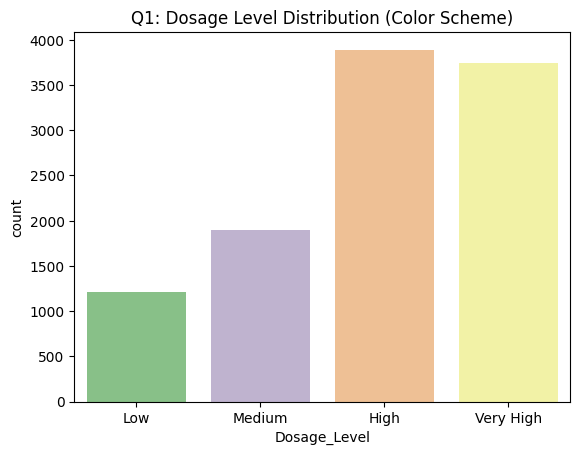

Q2: Aggregated summary:
                 Dosage  Missed_Dose
Department                         
Cardiology  157.133866          202
ICU         156.737422          214
Neurology   159.180821          218
Oncology    159.442482          207
Pediatrics  162.114466          232


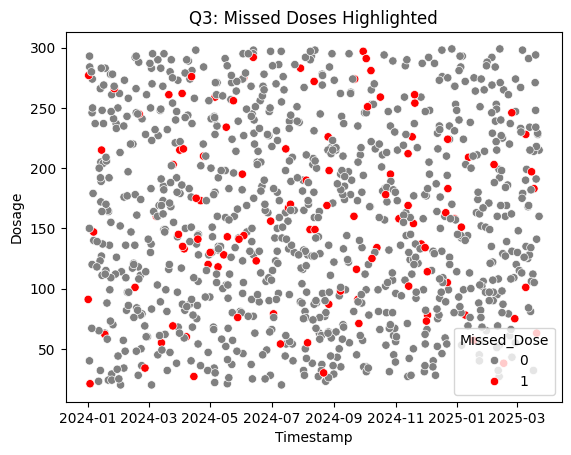

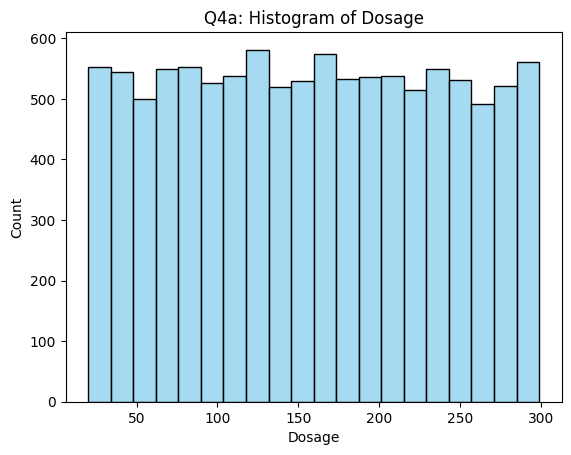

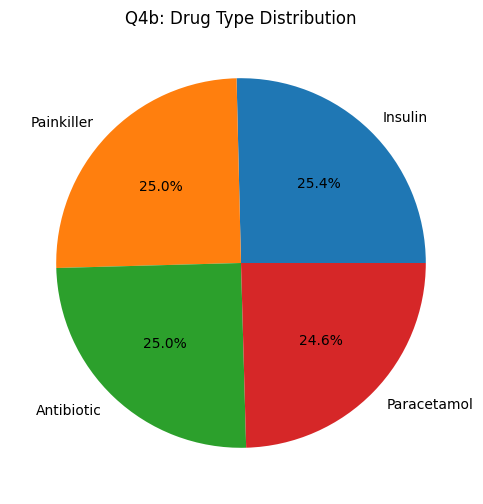

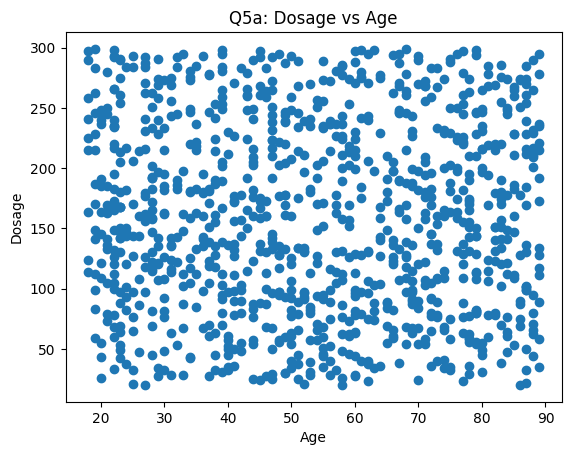

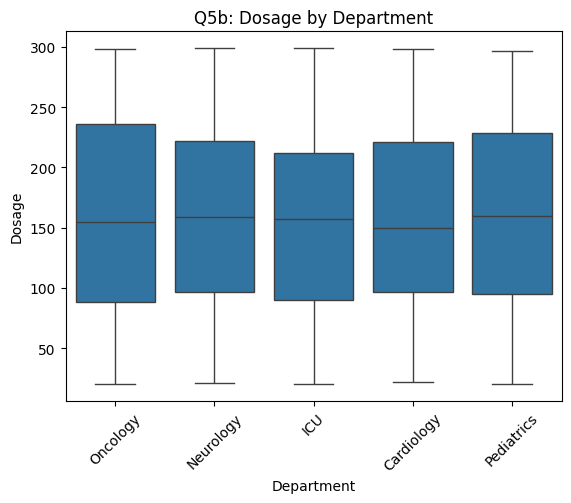

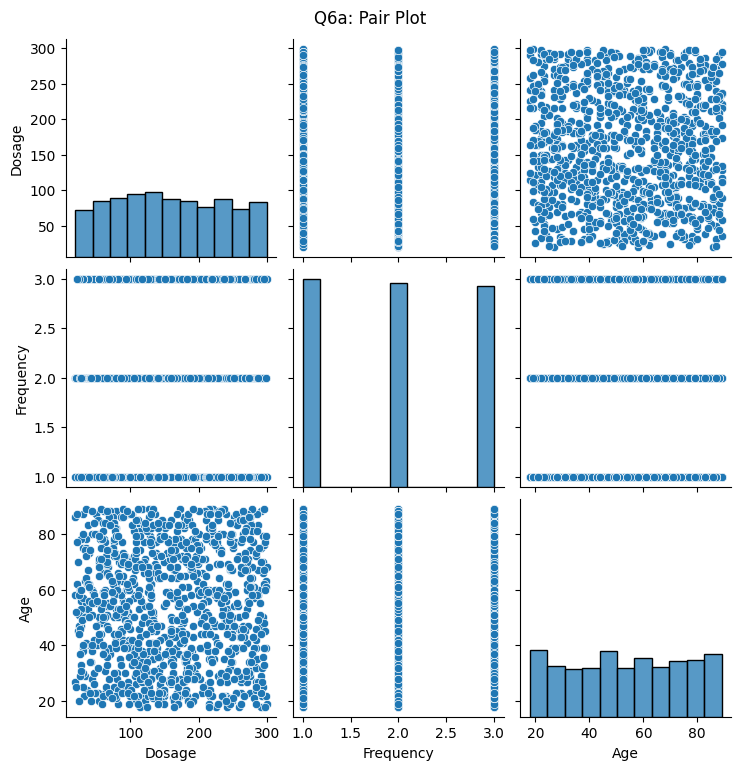

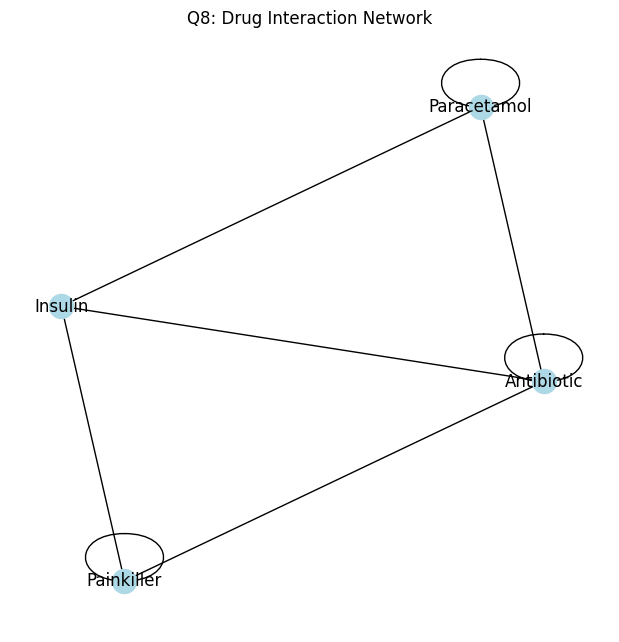

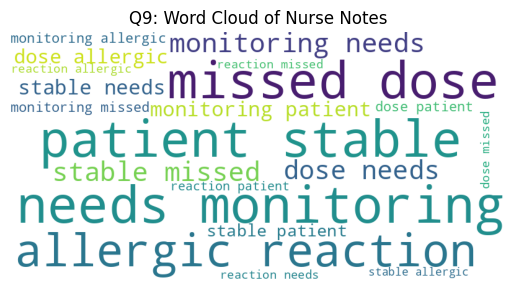


Q10: Dashboard Design
- Combine hierarchical, network, and text analytics.
- Use tabs for dosage trends, departments, nurse notes.
- Color-code missed doses (red) and safe levels (green).
- Integrate real-time adherence tracking.



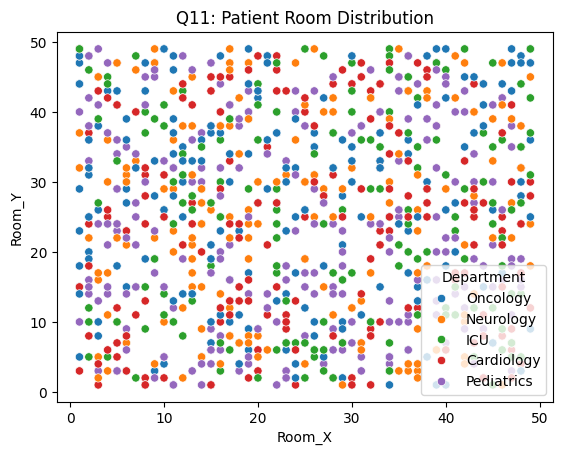

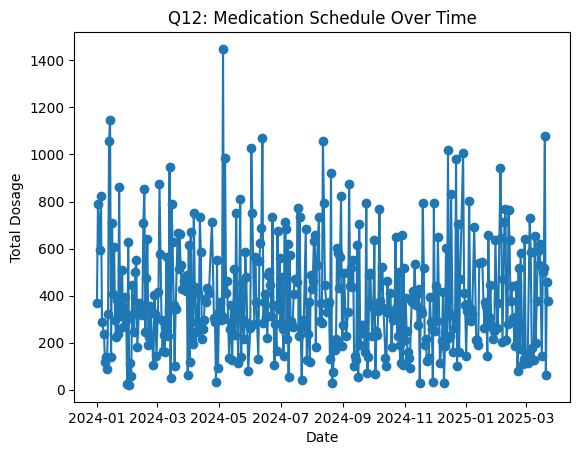

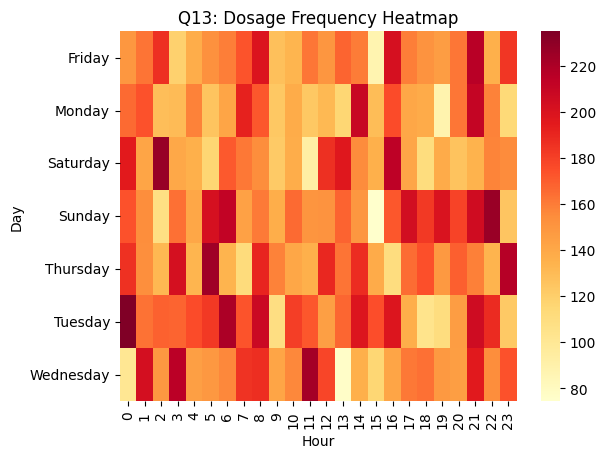

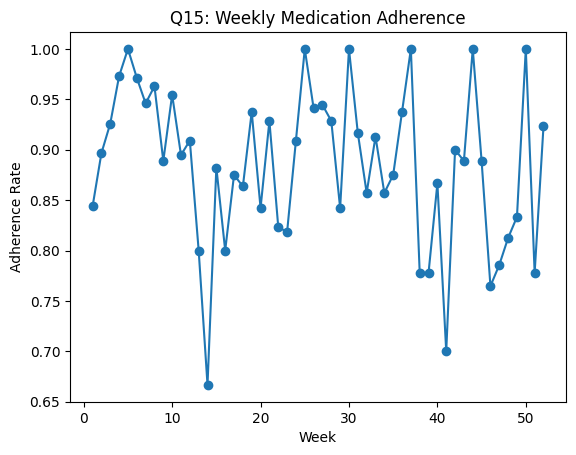

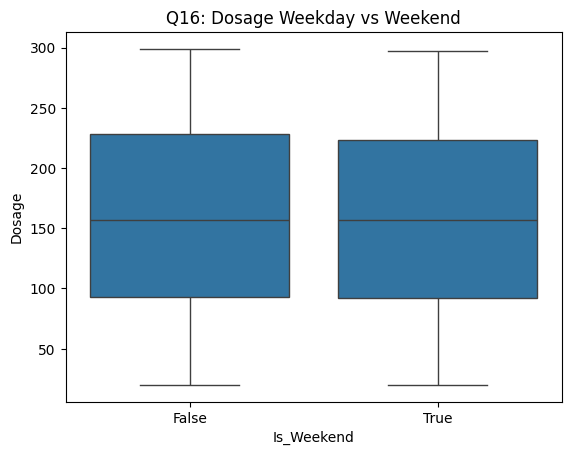

Q17: Regression Coefficients: [-3.29401199e-04 -1.67084454e-04 -6.80268058e-05]


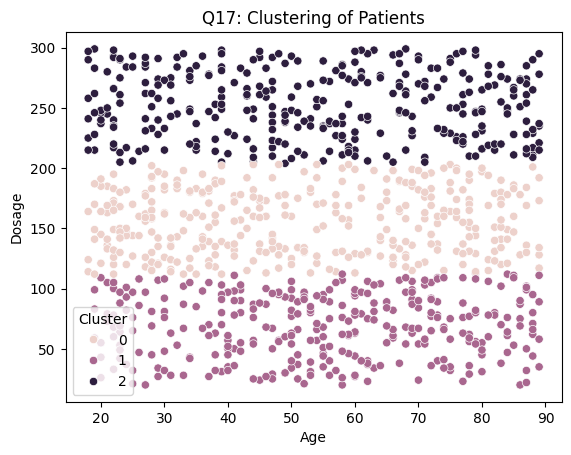

Q18: Predictive Model Evaluation
R² Score: 0.0008
Mean Absolute Error (MAE): 0.1894
Mean Squared Error (MSE): 0.0947
Root Mean Squared Error (RMSE): 0.3077


In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import plotly.io as pio
pio.renderers.default = "colab"

data = pd.read_csv("dataset_dv.csv")

data.columns = data.columns.str.strip().str.replace(' ', '_')

# --- Identify patient columns ---
patient_cols = [c for c in data.columns if 'patient' in c.lower()]
if patient_cols:
    data.rename(columns={patient_cols[0]: 'Patient_ID'}, inplace=True)

# --- Remove duplicated columns ---
if data.columns.duplicated().any():
    data = data.loc[:, ~data.columns.duplicated()]

# ==========================
np.random.seed(42)
# Explicitly add these columns if they don't exist, as they are used later.
if 'Dosage' not in data.columns:
    data['Dosage'] = np.random.randint(20, 300, len(data))
if 'Drug' not in data.columns:
    data['Drug'] = np.random.choice(['Paracetamol','Insulin','Antibiotic','Painkiller'], len(data))
if 'Department' not in data.columns:
    data['Department'] = np.random.choice(['Cardiology','ICU','Neurology','Oncology','Pediatrics'], len(data))
if 'Age' not in data.columns:
    data['Age'] = np.random.randint(18, 90, len(data))


data['Timestamp'] = pd.date_range("2024-01-01", periods=len(data), freq='H')
data['Missed_Dose'] = np.random.choice([0,1], len(data), p=[0.9,0.1])
data['Adherence'] = 1 - data['Missed_Dose']
data['Frequency'] = np.random.randint(1,4,len(data))
data['Nurse_Notes'] = np.random.choice(
    ['patient stable','missed dose','allergic reaction','needs monitoring'],
    len(data))

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# ======================================================
# 3️⃣ Reduce Dataset for Heavy Plots (Colab Safe)
# ======================================================
sample_size = min(1000, len(data))
data_sample = data.sample(n=sample_size, random_state=42)

# ======================================================
# Q1: Color Schemes for Dosage Levels
# ======================================================
bins = [0,50,100,200,np.inf]
labels = ['Low','Medium','High','Very High']
data['Dosage_Level'] = pd.cut(data['Dosage'], bins=bins, labels=labels)
colors = {'Low':'#7fc97f','Medium':'#beaed4','High':'#fdc086','Very High':'#ffff99'}

sns.countplot(x='Dosage_Level', data=data, palette=colors)
plt.title("Q1: Dosage Level Distribution (Color Scheme)")
plt.show()

# ======================================================
# Q2: Aggregated Summary
# ======================================================
agg = data.groupby('Department').agg({'Dosage':'mean','Missed_Dose':'sum'})
print("Q2: Aggregated summary:\n", agg.head())

# ======================================================
# Q3: Highlight Missed Doses
# ======================================================
sns.scatterplot(x='Timestamp', y='Dosage', hue='Missed_Dose', palette={0:'gray',1:'red'}, data=data_sample)
plt.title("Q3: Missed Doses Highlighted")
plt.show()

# ======================================================
# Q4: Univariate Analysis
# ======================================================
sns.histplot(data['Dosage'], bins=20, color='skyblue')
plt.title("Q4a: Histogram of Dosage")
plt.show()

data['Drug'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Q4b: Drug Type Distribution")
plt.ylabel('')
plt.show()

# ======================================================
# Q5: Bivariate Analysis
# ======================================================
plt.scatter(data_sample['Age'], data_sample['Dosage'])
plt.title("Q5a: Dosage vs Age")
plt.xlabel("Age")
plt.ylabel("Dosage")
plt.show()

sns.boxplot(x='Department', y='Dosage', data=data_sample)
plt.xticks(rotation=45)
plt.title("Q5b: Dosage by Department")
plt.show()

# ======================================================
# Q6: Multivariate Analysis
# ======================================================
sns.pairplot(data_sample[['Dosage','Frequency','Age']])
plt.suptitle("Q6a: Pair Plot", y=1.02)
plt.show()

fig = px.scatter_3d(data_sample, x='Dosage', y='Frequency', z='Age', color='Department',
                    title="Q6b: 3D Scatter")
fig.show()

# ======================================================
# Q7: Hierarchical Visualization
# ======================================================
top_data = data_sample.groupby('Department').head(20)
fig = px.treemap(top_data, path=['Department','Patient_ID'], values='Dosage', color='Department',
                 title="Q7: Department → Patient Hierarchy")
fig.show()

# ======================================================
# Q8: Network Graph of Drug Interactions
# ======================================================
G = nx.Graph()
for d in data['Drug'].unique():
    others = np.random.choice(data['Drug'].unique(), 2, replace=False)
    for o in others: G.add_edge(d, o)
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_color='lightblue')
plt.title("Q8: Drug Interaction Network")
plt.show()


# ======================================================
# Q9: Word Cloud for Nurse Notes
# ======================================================
text = ' '.join(data['Nurse_Notes'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wc); plt.axis('off')
plt.title("Q9: Word Cloud of Nurse Notes")
plt.show()

# ======================================================
# Q10: Dashboard Steps
# ======================================================
print("""
Q10: Dashboard Design
- Combine hierarchical, network, and text analytics.
- Use tabs for dosage trends, departments, nurse notes.
- Color-code missed doses (red) and safe levels (green).
- Integrate real-time adherence tracking.
""")

# ======================================================
# Q11: Patient Room Map
# ======================================================
data_sample['Room_X'] = np.random.randint(1,50,len(data_sample))
data_sample['Room_Y'] = np.random.randint(1,50,len(data_sample))
sns.scatterplot(x='Room_X', y='Room_Y', hue='Department', data=data_sample)
plt.title("Q11: Patient Room Distribution")
plt.show()

# ======================================================
# Q12: Line – Medication Schedule
# ======================================================
daily = data_sample.groupby(data_sample['Timestamp'].dt.date)['Dosage'].sum()
plt.plot(daily.index, daily.values, marker='o')
plt.title("Q12: Medication Schedule Over Time")
plt.xlabel("Date"); plt.ylabel("Total Dosage")
plt.show()

# ======================================================
# Q13: Heatmap – Dosage Frequency
# ======================================================
data_sample['Hour'] = data_sample['Timestamp'].dt.hour
data_sample['Day'] = data_sample['Timestamp'].dt.day_name()
pivot = data_sample.pivot_table(index='Day', columns='Hour', values='Dosage', aggfunc='mean').reindex(columns=range(24))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Q13: Dosage Frequency Heatmap")
plt.show()

# ======================================================
# Q14: Animated Daily Administration
# ======================================================
fig = px.scatter(data_sample.sample(min(500, len(data_sample))), x='Age', y='Dosage', animation_frame='Day',
                 color='Department', title="Q14: Daily Medication Pattern")
fig.show()

# ======================================================
# Q15: Weekly Adherence
# ======================================================
data_sample['Week'] = data_sample['Timestamp'].dt.isocalendar().week
weekly = data_sample.groupby('Week')['Adherence'].mean()
weekly.plot(marker='o')
plt.title("Q15: Weekly Medication Adherence")
plt.ylabel("Adherence Rate")
plt.show()

# ======================================================
# Q16: Weekday vs Weekend
# ======================================================
data_sample['Is_Weekend'] = data_sample['Timestamp'].dt.dayofweek >= 5
sns.boxplot(x='Is_Weekend', y='Dosage', data=data_sample)
plt.title("Q16: Dosage Weekday vs Weekend")
plt.show()

# ======================================================
# Q17: Regression & Clustering
# ======================================================
X = data_sample[['Age','Frequency','Dosage']]
y = data_sample['Adherence']

model = LinearRegression().fit(X, y)
print("Q17: Regression Coefficients:", model.coef_)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
data_sample['Cluster'] = kmeans.labels_
sns.scatterplot(x='Age', y='Dosage', hue='Cluster', data=data_sample)
plt.title("Q17: Clustering of Patients")
plt.show()

# ======================================================
# Q18: Predictive Model Evaluation
# ======================================================
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("Q18: Predictive Model Evaluation")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")